### Review lecture, example 3:
Reading a wavefile and plotting its (amplitude) spectrogram

The review lecture targets warming up with simple audio signal processing tasks from previous semester. In the third example, we review computation of the spectrogram in the form of a matrix ploted as an image. Amplitude spectrum computation is provided as a function. You are expected to write the code to extract frames, use the given function to compute amplitude spectrum for each frame and stack spectra of the frames in a matrix to form the spectrogram.

Credits: SMS course (Xavier Serra), Lecture 4
https://github.com/MTG/sms-tools

Your part to be implemented is marked with: #Your code starts here ...  #Your code ends here

In [1]:
import os
import sys
import numpy as np
from scipy.signal import get_window
from scipy.fftpack import fft
import matplotlib.pyplot as plt
#Adding to path the models folder of sms-tools
sys.path.append(os.path.join(os.path.dirname('__file__'), 'sms-tools/software/models/'))
sys.path.append(os.path.join(os.path.dirname('__file__'), 'sms-tools/software/models/utilFunctions_C/'))

import stft as STFT
import utilFunctions as UF

%matplotlib inline

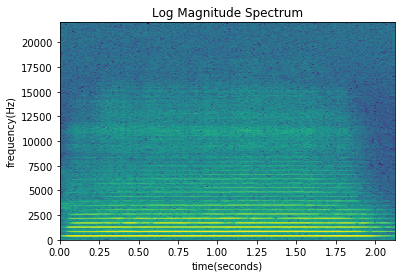

In [3]:
# Function definition----
def logMagnitudeSpectrum(x,fftN):
    '''Log magnitude spectrum computation
    Returns only the first half of the spectrum
    
    Parameters
    ----------
    x : numpy.array
        Input sound signal
    fftN : int
        Number of bins for Fast Fourier Transform computation
    
    Returns
    -------
    mX : numpy.array
        First half of the log magnitude spectrum
    '''
    X=fft(x,fftN)#computing fft
    absX=np.abs(X[:int(fftN/2)])#taking first half of the spectrum and its magnitude
    absX[absX<np.finfo(float).eps]=np.finfo(float).eps#getting rid of zeros before the next step
    mX=20*np.log10(absX)
    return mX
#------------------------
#Initialize parameters
soundsDIR='sms-tools/sounds/'
windowSize=1024
hopSize=windowSize/2
windowFunction='blackman'
fftN=2048

#Create the window function
w = get_window(windowFunction, windowSize)

#Read and normalize the signal
(fs,x)=UF.wavread(soundsDIR+'flute-A4.wav')
x=x/np.max(np.abs(x))
#Compute required parameters for windowing
startIndexes=np.arange(0, x.size-windowSize,hopSize, dtype=int)
numWindows=startIndexes.size

#Your code starts here----------
#Write the code to compute spectrogram (mX) in the form of a matrix
# - perform windowing and use the logMagnitudeSpectrum function to compute the spectrum for each frame
mX = np.array([]).reshape(0,int(fftN/2))
for k in range(numWindows):
    startInd=startIndexes[k]
    x_win=x[startInd:startInd+windowSize]*w
    mX = np.vstack((mX,logMagnitudeSpectrum(x_win,fftN)))

#Your code ends here----------

#Plotting the spectrogram(matrix)
timeAxSec=np.arange(mX.shape[0])*hopSize/float(fs)
freqAx_normalized=np.arange(mX.shape[1])/float(fftN)#Normalized frequency axis
freqAxHz=float(fs)*freqAx_normalized

plt.pcolormesh(timeAxSec,freqAxHz,np.transpose(mX))
plt.xlim([0,timeAxSec[-1]])
plt.ylim([0,freqAxHz[-1]])
plt.title('Log Magnitude Spectrum')
plt.ylabel('frequency(Hz)')
plt.xlabel('time(seconds)')
plt.show()